# Data Sience Project - Task 4

### Spark with Clustering (task 3 in spark)

In [1]:
import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName('clustering_in_spark').getOrCreate()

#### Read data from csv

In [3]:
df=spark.read.csv('Hotels_data_Changed.csv',inferSchema=True,header=True)

In [4]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Snapshot ID: integer (nullable = true)
 |-- Snapshot Date: timestamp (nullable = true)
 |-- Checkin Date: timestamp (nullable = true)
 |-- Days: integer (nullable = true)
 |-- Original Price: integer (nullable = true)
 |-- Discount Price: integer (nullable = true)
 |-- Discount Code: integer (nullable = true)
 |-- Available Rooms: integer (nullable = true)
 |-- Hotel Name: string (nullable = true)
 |-- Hotel Stars: integer (nullable = true)
 |-- DayDiff: integer (nullable = true)
 |-- WeekDay: string (nullable = true)
 |-- DiscountDiff: integer (nullable = true)
 |-- DiscountPerc: double (nullable = true)



## 4.a

In [5]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import DateType, IntegerType
from pyspark.sql.functions import desc

#### Get the 150 hotels with maximum records

In [6]:
# group by hotel name and count,with sortig 
hotel_names = df.groupBy('Hotel Name').count().sort(desc('count')).limit(150)

In [7]:
hotel_names

DataFrame[Hotel Name: string, count: bigint]

#### Get list of the first (max) 150 hotels

In [8]:
maxHotel_names = hotel_names.toPandas()['Hotel Name'].tolist()

In [9]:
maxHotel_names

['Newark Liberty International Airport Marriott',
 'Hilton Garden Inn Times Square',
 'Residence Inn Newark Elizabeth Liberty International Airport',
 'Westin New York at Times Square',
 'Loews Regency New York Hotel',
 'Viceroy New York',
 'Four Seasons Hotel New York',
 'Langham Place New York Fifth Avenue',
 'The Carlyle A Rosewood Hotel',
 'DoubleTree by Hilton Metropolitan - New York City',
 'Magnuson Convention Center Hotel',
 'Hilton Garden Inn New York West 35th Street',
 'Hilton Garden Inn New York-Times Square Central',
 'Conrad New York',
 'Wyndham Garden Brooklyn Sunset Park',
 'Hilton Newark Airport',
 'Omni Berkshire Place',
 'Hilton Times Square',
 'Park Hyatt New York',
 'Homewood Suites by Hilton NY Midtown Manhattan Times Square',
 'Grand Hyatt New York',
 'The Plaza Hotel',
 'Quality Inn Woodside',
 'Hyatt Union Square New York',
 'Le Parker Meridien New York',
 'The New York EDITION',
 'W New York - Union Square',
 'Renaissance Newark Airport Hotel',
 'Hampton Inn N

#### Adding and filtering the other features

In [10]:
hotels_data = df.filter(col('Hotel Name').isin(maxHotel_names)).distinct()

#### Check

In [11]:
hotels_data

DataFrame[_c0: int, Snapshot ID: int, Snapshot Date: timestamp, Checkin Date: timestamp, Days: int, Original Price: int, Discount Price: int, Discount Code: int, Available Rooms: int, Hotel Name: string, Hotel Stars: int, DayDiff: int, WeekDay: string, DiscountDiff: int, DiscountPerc: double]

In [12]:
hotels_data.show()

+----+-----------+-------------------+-------------------+----+--------------+--------------+-------------+---------------+--------------------+-----------+-------+---------+------------+------------------+
| _c0|Snapshot ID|      Snapshot Date|       Checkin Date|Days|Original Price|Discount Price|Discount Code|Available Rooms|          Hotel Name|Hotel Stars|DayDiff|  WeekDay|DiscountDiff|      DiscountPerc|
+----+-----------+-------------------+-------------------+----+--------------+--------------+-------------+---------------+--------------------+-----------+-------+---------+------------+------------------+
| 168|          1|2015-07-17 00:00:00|2015-08-10 00:00:00|   5|          1193|          1102|            1|             -1|Hampton Inn Manha...|          3|     24|   Monday|          91| 7.627829002514669|
| 179|          1|2015-07-17 00:00:00|2015-08-19 00:00:00|   5|          1500|          1415|            1|             -1|Courtyard by Marr...|          4|     33|Wednesda

## 4.b

#### Get the 40 hotels with maximum checkin dates

In [13]:
# group by checkin and count, with sorting
checkin = hotels_data.groupBy('Checkin Date').count().sort(desc('count')).limit(40)

In [14]:
checkin.show()

+-------------------+-----+
|       Checkin Date|count|
+-------------------+-----+
|2015-11-11 00:00:00| 2302|
|2015-10-14 00:00:00| 1887|
|2015-11-04 00:00:00| 1885|
|2015-08-19 00:00:00| 1883|
|2015-10-28 00:00:00| 1861|
|2015-10-21 00:00:00| 1817|
|2015-11-06 00:00:00| 1808|
|2015-08-12 00:00:00| 1765|
|2015-11-05 00:00:00| 1684|
|2015-10-22 00:00:00| 1662|
|2015-11-12 00:00:00| 1649|
|2015-10-29 00:00:00| 1623|
|2015-09-10 00:00:00| 1623|
|2015-09-09 00:00:00| 1616|
|2015-11-18 00:00:00| 1582|
|2015-08-26 00:00:00| 1559|
|2015-11-10 00:00:00| 1548|
|2015-11-13 00:00:00| 1547|
|2015-10-15 00:00:00| 1473|
|2015-11-21 00:00:00| 1469|
+-------------------+-----+
only showing top 20 rows



#### get list of the first (max) 40 checkin dates

In [15]:
maxCheckin = checkin.toPandas()['Checkin Date'].tolist()

In [16]:
maxCheckin

[Timestamp('2015-11-11 00:00:00'),
 Timestamp('2015-10-14 00:00:00'),
 Timestamp('2015-11-04 00:00:00'),
 Timestamp('2015-08-19 00:00:00'),
 Timestamp('2015-10-28 00:00:00'),
 Timestamp('2015-10-21 00:00:00'),
 Timestamp('2015-11-06 00:00:00'),
 Timestamp('2015-08-12 00:00:00'),
 Timestamp('2015-11-05 00:00:00'),
 Timestamp('2015-10-22 00:00:00'),
 Timestamp('2015-11-12 00:00:00'),
 Timestamp('2015-09-10 00:00:00'),
 Timestamp('2015-10-29 00:00:00'),
 Timestamp('2015-09-09 00:00:00'),
 Timestamp('2015-11-18 00:00:00'),
 Timestamp('2015-08-26 00:00:00'),
 Timestamp('2015-11-10 00:00:00'),
 Timestamp('2015-11-13 00:00:00'),
 Timestamp('2015-10-15 00:00:00'),
 Timestamp('2015-11-21 00:00:00'),
 Timestamp('2015-09-30 00:00:00'),
 Timestamp('2015-10-30 00:00:00'),
 Timestamp('2015-09-16 00:00:00'),
 Timestamp('2015-09-17 00:00:00'),
 Timestamp('2015-11-28 00:00:00'),
 Timestamp('2015-10-01 00:00:00'),
 Timestamp('2015-11-26 00:00:00'),
 Timestamp('2015-09-11 00:00:00'),
 Timestamp('2015-09-

#### Adding and filtering the other features

In [17]:
hotelsCheckin = hotels_data.filter(col('Checkin Date').isin(maxCheckin)).distinct()

#### Check

In [18]:
hotelsCheckin

DataFrame[_c0: int, Snapshot ID: int, Snapshot Date: timestamp, Checkin Date: timestamp, Days: int, Original Price: int, Discount Price: int, Discount Code: int, Available Rooms: int, Hotel Name: string, Hotel Stars: int, DayDiff: int, WeekDay: string, DiscountDiff: int, DiscountPerc: double]

In [19]:
hotelsCheckin= hotelsCheckin.groupBy('Hotel name','Checkin Date', 'Discount Code').min('Discount Price')


In [20]:
hotelsCheckin.show()

+--------------------+-------------------+-------------+-------------------+
|          Hotel name|       Checkin Date|Discount Code|min(Discount Price)|
+--------------------+-------------------+-------------+-------------------+
|Hampton Inn Manha...|2015-11-03 00:00:00|            3|               1255|
|Hilton Garden Inn...|2015-08-13 00:00:00|            4|               1007|
|Hilton Garden Inn...|2015-09-30 00:00:00|            1|               1426|
|Wyndham Garden Ch...|2015-10-30 00:00:00|            3|               1209|
|    Viceroy New York|2015-11-13 00:00:00|            2|               1822|
|Homewood Suites b...|2015-08-12 00:00:00|            1|               1195|
|Gild Hall A Thomp...|2015-09-09 00:00:00|            1|               1396|
|Omni Berkshire Place|2015-08-27 00:00:00|            2|               1156|
|Smyth A Thompson ...|2015-09-30 00:00:00|            3|               2525|
|Grand Hyatt New York|2015-10-14 00:00:00|            4|               1655|

## 4.c

#### We need to take for each checkin the 4 prices for the 4 discount codes, for this we need to make a new table and do join with the table that we already have

In [21]:
#the unique hotels name
names=hotelsCheckin.select('Hotel Name').distinct().collect()

In [22]:
#the unique hotels name- list
namesList= [(row['Hotel Name']) for row in names]

In [23]:
namesList

['Bentley Hotel',
 'Westin New York at Times Square',
 'The Westin New York Grand Central',
 'Super 8 Brooklyn   Park Slope Hotel',
 'Four Seasons Hotel New York',
 'Omni Berkshire Place',
 'DoubleTree by Hilton Metropolitan - New York City',
 'Dumont NYC-an Affinia hotel',
 'Hampton Inn Manhattan Downtown-Financial District',
 'Eventi Hotel a Kimpton Hotel',
 'Magnuson Convention Center Hotel',
 'Courtyard Newark Elizabeth',
 'Park Hyatt New York',
 'Roxy Hotel Tribeca (formerly the Tribeca Grand Hotel)',
 'The Kitano New York',
 'Waldorf Astoria New York',
 'Courtyard by Marriott New York Manhattan SoHo',
 'Hyatt Place New York Midtown South',
 'Hilton Garden Inn New York Manhattan-Chelsea',
 'Baccarat Hotel and Residences New York',
 'The St. Regis New York',
 'New York Hilton Midtown',
 'Hampton Inn Manhattan Times Square South',
 'The Pearl New York',
 'Best Western Plus Newark Airport West',
 'Wyndham Garden - Manhattan Chelsea West',
 'Martha Washington',
 'The Plaza Hotel',
 'B

In [24]:
#the unique checking date
checkins=hotelsCheckin.select('Checkin Date').distinct().collect()

In [25]:
#the unique checking date- list
checkinsList= [(row['Checkin Date']) for row in checkins]

In [26]:
checkinsList

[datetime.datetime(2015, 11, 26, 0, 0),
 datetime.datetime(2015, 8, 26, 0, 0),
 datetime.datetime(2015, 10, 15, 0, 0),
 datetime.datetime(2015, 9, 16, 0, 0),
 datetime.datetime(2015, 9, 11, 0, 0),
 datetime.datetime(2015, 8, 28, 0, 0),
 datetime.datetime(2015, 11, 5, 0, 0),
 datetime.datetime(2015, 8, 12, 0, 0),
 datetime.datetime(2015, 11, 10, 0, 0),
 datetime.datetime(2015, 11, 13, 0, 0),
 datetime.datetime(2015, 10, 1, 0, 0),
 datetime.datetime(2015, 8, 27, 0, 0),
 datetime.datetime(2015, 11, 3, 0, 0),
 datetime.datetime(2015, 9, 30, 0, 0),
 datetime.datetime(2015, 8, 19, 0, 0),
 datetime.datetime(2015, 11, 11, 0, 0),
 datetime.datetime(2015, 11, 7, 0, 0),
 datetime.datetime(2015, 9, 9, 0, 0),
 datetime.datetime(2015, 11, 25, 0, 0),
 datetime.datetime(2015, 11, 4, 0, 0),
 datetime.datetime(2015, 10, 30, 0, 0),
 datetime.datetime(2015, 10, 27, 0, 0),
 datetime.datetime(2015, 10, 29, 0, 0),
 datetime.datetime(2015, 10, 21, 0, 0),
 datetime.datetime(2015, 11, 28, 0, 0),
 datetime.datet

In [27]:
#the unique discount code
uniqueCode= [1,2,3,4]

#### Build the table that will help us insert the 4 codes for each checkin

In [28]:
helpTable=[]
for x in namesList:
    for y in checkinsList:
        for z in uniqueCode:
            helpTable.append([x, y ,z,-1])

In [29]:
len(checkinsList)

40

#### Making the schema for dataframe

In [30]:
from pyspark.sql.types import *
import numpy as np

In [31]:
dfSchema = StructType([StructField("Hotel Name", StringType()),StructField("Checkin Date", DateType()),StructField("Discount Code",  IntegerType()),StructField("min(Discount Price)", LongType())])

#### Creating spark dataframe

In [32]:
s_df= spark.createDataFrame(helpTable, schema=dfSchema)

In [33]:
s_df.groupby(['Hotel name','Checkin Date','Discount Code']).count().show()

+--------------------+------------+-------------+-----+
|          Hotel name|Checkin Date|Discount Code|count|
+--------------------+------------+-------------+-----+
|Westin New York a...|  2015-11-27|            4|    1|
|Super 8 Brooklyn ...|  2015-10-30|            4|    1|
|Four Seasons Hote...|  2015-11-18|            1|    1|
|Four Seasons Hote...|  2015-11-27|            1|    1|
|Omni Berkshire Place|  2015-08-12|            3|    1|
|Dumont NYC-an Aff...|  2015-08-12|            3|    1|
|Dumont NYC-an Aff...|  2015-11-28|            2|    1|
|Dumont NYC-an Aff...|  2015-10-02|            4|    1|
|Hampton Inn Manha...|  2015-09-11|            4|    1|
|Roxy Hotel Tribec...|  2015-08-12|            3|    1|
| The Kitano New York|  2015-09-11|            1|    1|
| The Kitano New York|  2015-11-06|            2|    1|
|Waldorf Astoria N...|  2015-10-16|            3|    1|
|Courtyard by Marr...|  2015-08-12|            3|    1|
|Courtyard by Marr...|  2015-11-28|            4

In [34]:
s_df.count()

23840

#### Filter from dataframe that we already have only :Hotel Name, Checkin Date, Discount Code, Discount Price

In [35]:
#hotels_df=hotelsCheckin.select('Hotel Name', 'Checkin Date','Discount Code', 'Discount Price')

In [36]:
#hotels_df.groupby(['Hotel Name', 'Checkin Date','Discount Code']).count().show()

#### Union the dataframe with the table that we build

In [37]:
all_df=hotelsCheckin.union(s_df)

In [38]:
all_df.show()

+--------------------+-------------------+-------------+-------------------+
|          Hotel name|       Checkin Date|Discount Code|min(Discount Price)|
+--------------------+-------------------+-------------+-------------------+
|Hampton Inn Manha...|2015-11-03 00:00:00|            3|               1255|
|Hilton Garden Inn...|2015-08-13 00:00:00|            4|               1007|
|Hilton Garden Inn...|2015-09-30 00:00:00|            1|               1426|
|Wyndham Garden Ch...|2015-10-30 00:00:00|            3|               1209|
|    Viceroy New York|2015-11-13 00:00:00|            2|               1822|
|Homewood Suites b...|2015-08-12 00:00:00|            1|               1195|
|Gild Hall A Thomp...|2015-09-09 00:00:00|            1|               1396|
|Omni Berkshire Place|2015-08-27 00:00:00|            2|               1156|
|Smyth A Thompson ...|2015-09-30 00:00:00|            3|               2525|
|Grand Hyatt New York|2015-10-14 00:00:00|            4|               1655|

In [39]:
alldf=all_df.groupby(['Hotel Name','Checkin Date','Discount Code']).max('min(Discount Price)')

In [40]:
#alldf.show(n=1000)

In [41]:
alldf

DataFrame[Hotel Name: string, Checkin Date: timestamp, Discount Code: int, max(min(Discount Price)): bigint]

#### Group by to order the details

In [42]:
#all_df = all_df.groupBy('Hotel name','Checkin Date', 'Discount Code').min('Discount Price')

In [43]:
#all_df.show()

#### Partition data by hotel name

In [44]:
#all_dfparts=alldf.repartition("Hotel name")

## 4.d

#### Split to two groups:  with price  -1,  without -1(the others)

In [45]:
groupMinus = alldf.filter(col('max(min(Discount Price))') == -1)
groupWithout = alldf.filter(col('max(min(Discount Price))') > -1)

### Normalization

In [46]:
groupWithout.createOrReplaceTempView("normalization")

#### Creating SQLContext for SQL converting

In [47]:
from pyspark.sql import SQLContext
from pyspark.sql.window import Window
import pyspark.sql.functions as func

In [48]:
sqlContext = SQLContext(spark)

#### Preparing data for normalization

In [49]:
dataFrame = sqlContext.table("normalization")

In [50]:
#Partioning data for groups so we can applay function on groups
windowSpec = Window.partitionBy(groupWithout['Hotel name']) 

### Normalize function

In [51]:
normalize =  ((dataFrame['max(min(Discount Price))'] - func.min(dataFrame['max(min(Discount Price))']).over(windowSpec)) / (func.max(dataFrame['max(min(Discount Price))']).over(windowSpec) - func.min(dataFrame['max(min(Discount Price))']).over(windowSpec)) * 100)

In [52]:
normalized = dataFrame.select(
  dataFrame['Hotel Name'],
  dataFrame['Checkin Date'],
  dataFrame['Discount Code'],
  normalize.alias("Normal"))

#### Getting back the values -1

In [53]:
#Changing column name for same schema
groupMinus = groupMinus.withColumnRenamed('max(min(Discount Price))','Normal')

#### Union all data frames with sorting

In [54]:
normalized = normalized.union(groupMinus)
normalized = normalized.orderBy(['Hotel name','Checkin Date','Discount Code'])

In [55]:
from pyspark.sql import functions as F
from pyspark.sql import types as T
from pyspark.ml.linalg import Vectors,VectorUDT
from pyspark.ml.linalg import SparseVector, DenseVector

In [56]:
to_vector = udf(lambda a: Vectors.dense(a), VectorUDT())

In [57]:
normalList = normalized.groupBy('Hotel name').agg(F.collect_list('Normal').alias("features"))

In [58]:
#normal_toList.collect()

In [59]:
normalList.rdd.map(lambda x: len(x[1])).collect()

[160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 156,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160,
 160]

In [60]:
import pandas as pd
columns=['Hotel Name']
for i in range(1,161):
    columns.append(i)
df = pd.DataFrame(normalList.rdd.map(lambda x: [x[0]] + x[1]).take(150), columns=columns)


## 4.e

#### We received dataframe that each line represents one hotel and has 161 columns - one for the hotel name and 160 for the normalized prices

In [61]:
df.head()

,Hotel Name,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,Bentley Hotel,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,-1.00000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,11.147851,-1.0
1,Super 8 Brooklyn Park Slope Hotel,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,12.389381,-1.00000,-1.000000,...,-1.00000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,24.778761,-1.000000,-1.0
2,The Westin New York Grand Central,12.132353,18.504902,21.875000,22.181373,9.987745,-1.000000,-1.000000,-1.00000,6.985294,...,-1.00000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
3,Westin New York at Times Square,14.533133,15.587349,19.427711,-1.000000,-1.000000,16.189759,-1.000000,14.38253,7.003012,...,21.23494,22.213855,-1.00000,26.731928,23.945783,19.578313,-1.000000,49.472892,45.783133,-1.0
4,Four Seasons Hotel New York,1.328502,5.314010,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,1.328502,...,32.36715,34.782609,32.36715,39.613527,37.198068,38.888889,46.859903,48.309179,42.995169,-1.0


In [62]:
df.columns

Index(['Hotel Name',            1,            2,            3,            4,
                  5,            6,            7,            8,            9,
       ...
                151,          152,          153,          154,          155,
                156,          157,          158,          159,          160],
      dtype='object', length=161)

In [63]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [64]:
#featuresCols = [str(i) for i in range(1,161)]

In [65]:
#featuresCols

In [66]:
#vec_assembler= VectorAssembler(inputCols=featuresCols,outputCol='features')

In [67]:
df['Hotel Name'].count()

149

## 4.f

#### Drawing the dendrogram

In [68]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from itertools import islice 
from matplotlib import pyplot as plt


#### if we have in data frame nan replace in -1 (for check)

In [69]:
df=df.fillna(-1)

#### Insert to dist linkage - the table only values (without hotelnames)  ,uses the Ward variance minimization algorithm- algorithm 'word' 

In [70]:
dist = linkage(df.iloc[:, 1:],'ward')
type(dist)
#how classes and how hotels
dist.shape

(148, 4)

#### Drawing -dendrogram

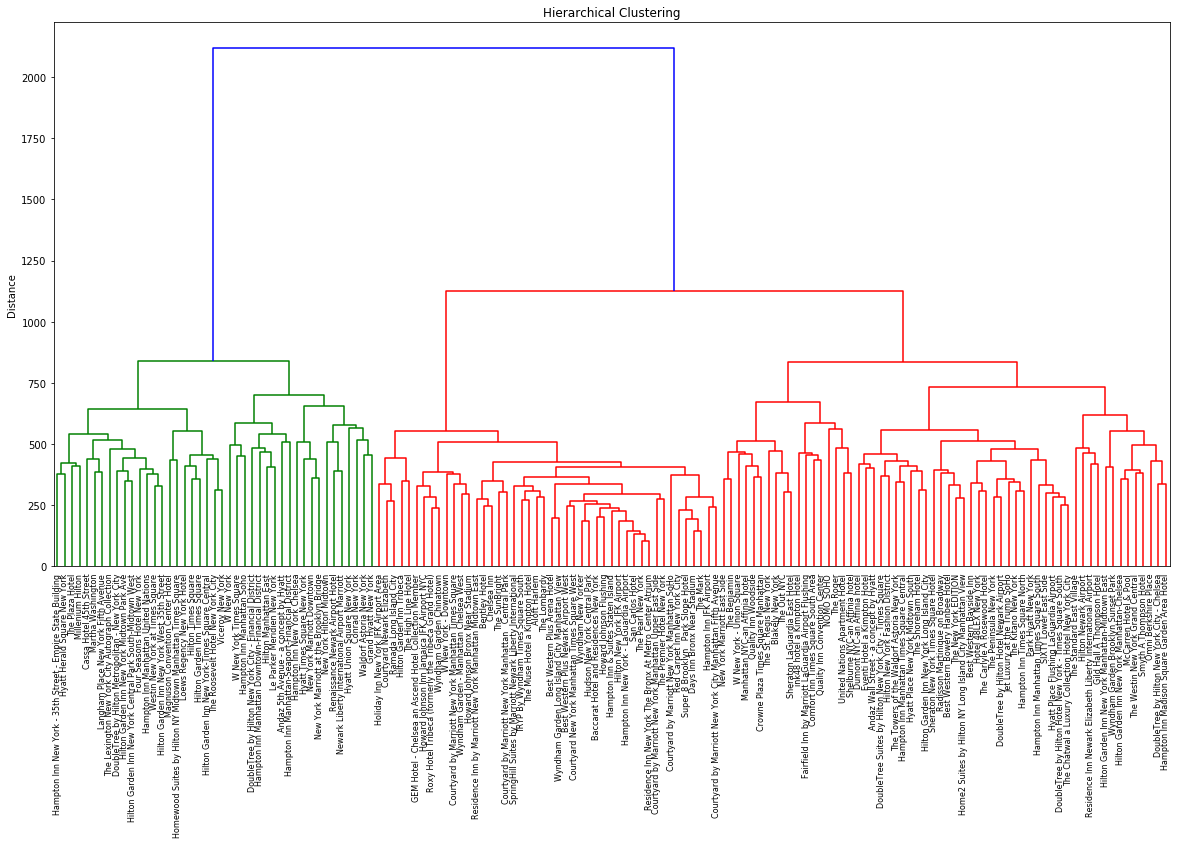

In [71]:
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering')
plt.ylabel('Distance')
dendrogram(dist, labels=df['Hotel Name'].tolist(), leaf_rotation=90,leaf_font_size=8)
plt.show()